<a href="https://colab.research.google.com/github/catarina1532/catarina1532-fads_ex_09_unsupervised_learning/blob/main/example03-cluster/032-pca-example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### GreenDS
# Fundamentals of Data Science
## Example on Unsupervised Machine Learning - Clustering
### Example 03.2

### Introduction

This Jupyter Notebook continues on the exeample 03.1. In this case, we will perform a dimensionality reduction using the Principal Component Analysis (PCA), and afterwards, will repeat the cluster analysis. The goal is to improve the quality of the cluster definition.

The data to be used is from the Agricultural Census of Portugal, from which data on **level of education**, **labour** data and **production** from 2019 was aggregated in one table, for the level of freguesia.

## 1. Prepare your environment and explore data

The first steps will be the same of the previous notebook.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import random
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# read data
census_df = pd.read_csv("/data_agric_census_freg.csv")
census_df.shape

(3068, 16)

In [3]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   freguesia      3068 non-null   object 
 1   municipality   3068 non-null   object 
 2   NUTS2          3068 non-null   object 
 3   e_none         3068 non-null   int64  
 4   e_basic        3068 non-null   int64  
 5   e_secondary    3068 non-null   int64  
 6   e_superior     3068 non-null   int64  
 7   l_family       3068 non-null   int64  
 8   l_holder       3068 non-null   int64  
 9   l_spouse       3068 non-null   int64  
 10  l_other_fam    3068 non-null   int64  
 11  l_regular      3068 non-null   int64  
 12  l_non_regular  3068 non-null   int64  
 13  l_non_hired    3068 non-null   int64  
 14  value_eur      3068 non-null   int64  
 15  area_ha        3068 non-null   float64
dtypes: float64(1), int64(12), object(3)
memory usage: 383.6+ KB


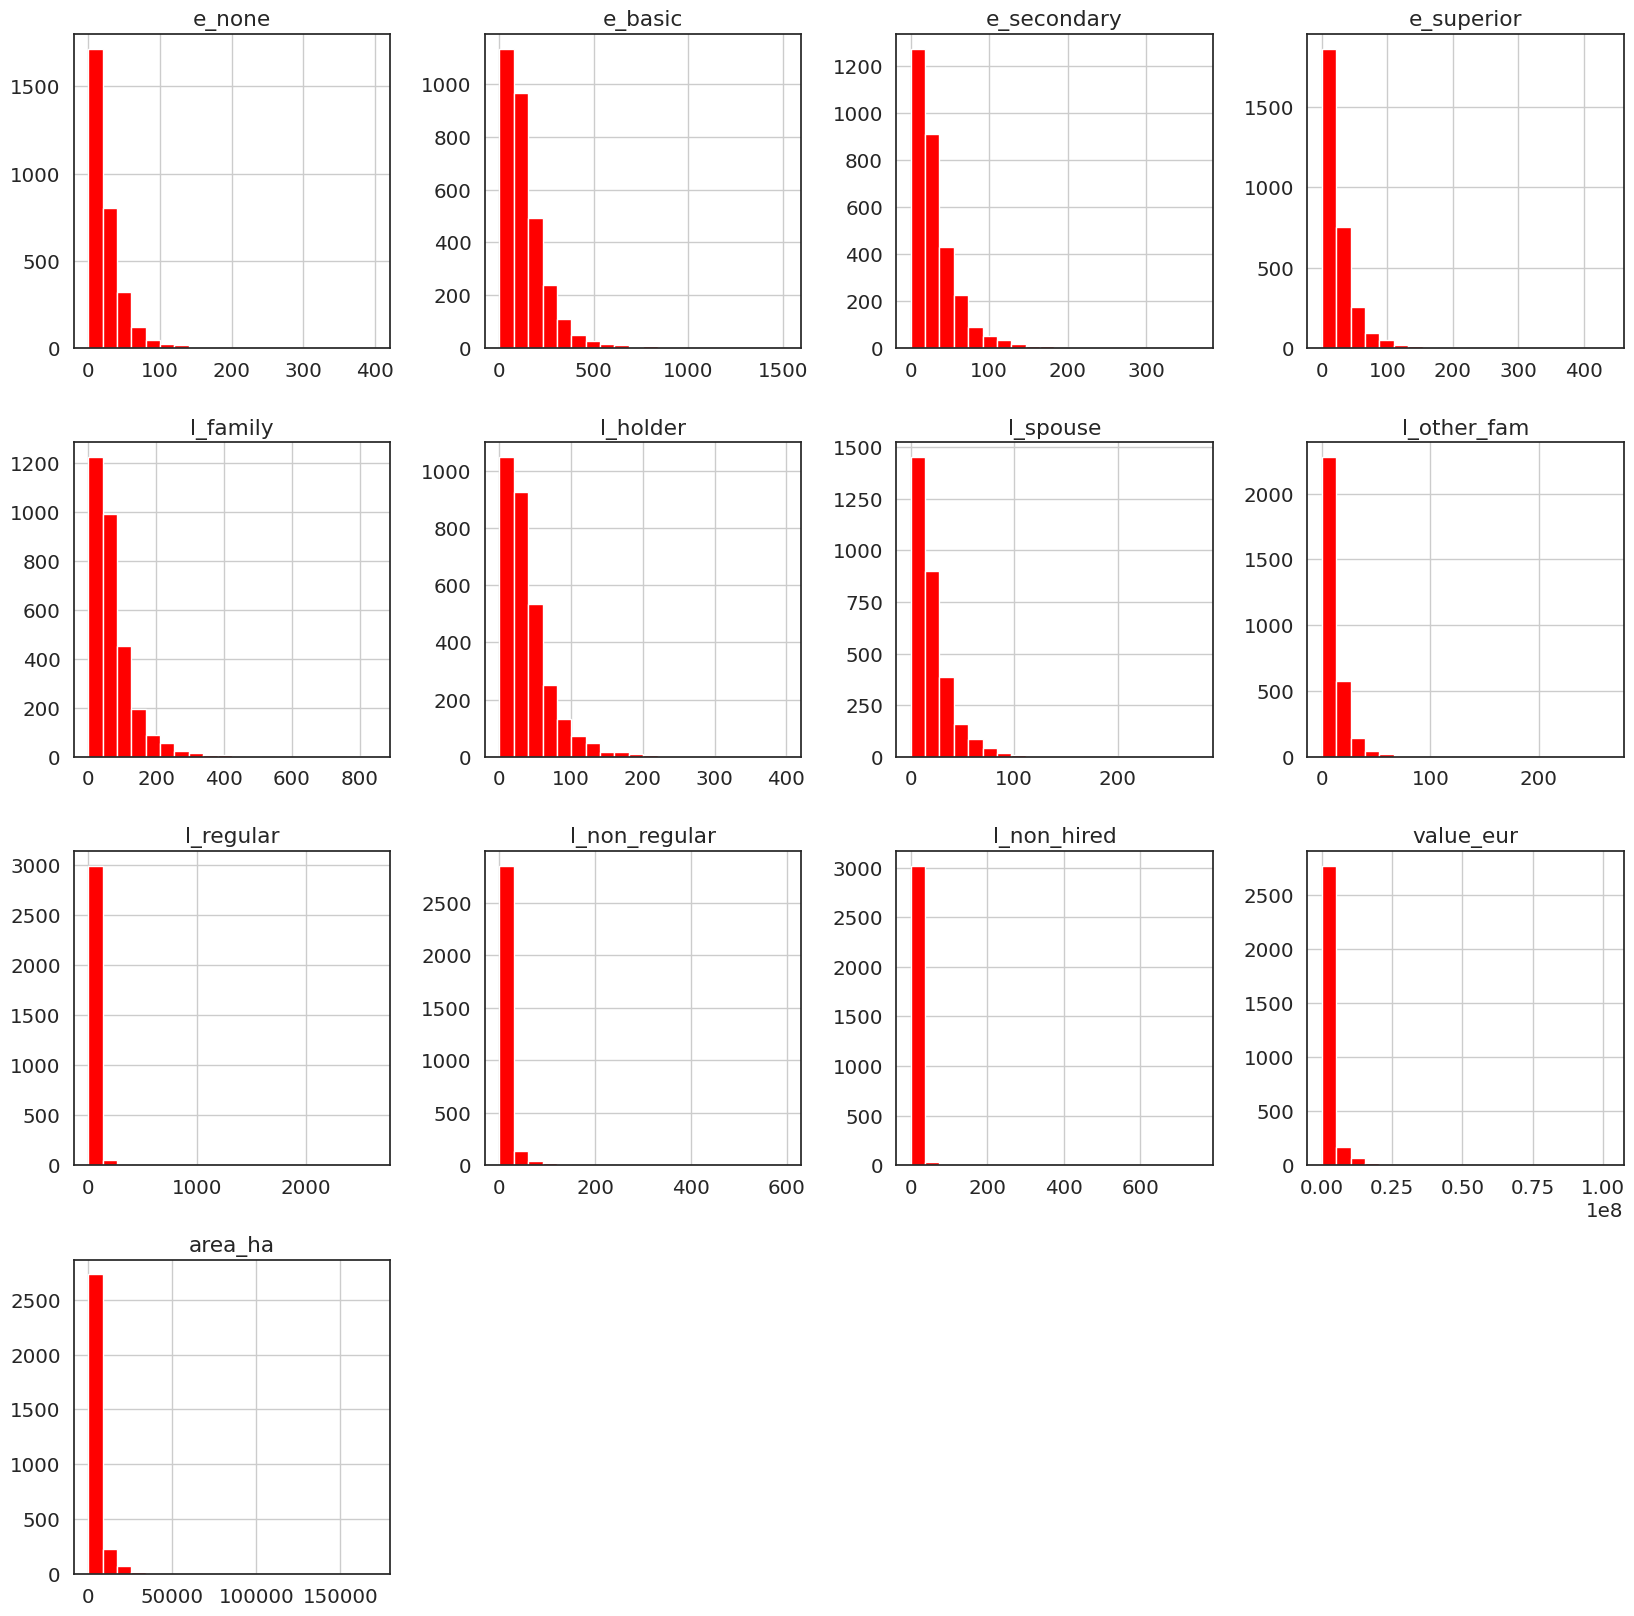

In [4]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=census_df.hist(bins=20,color='red' )

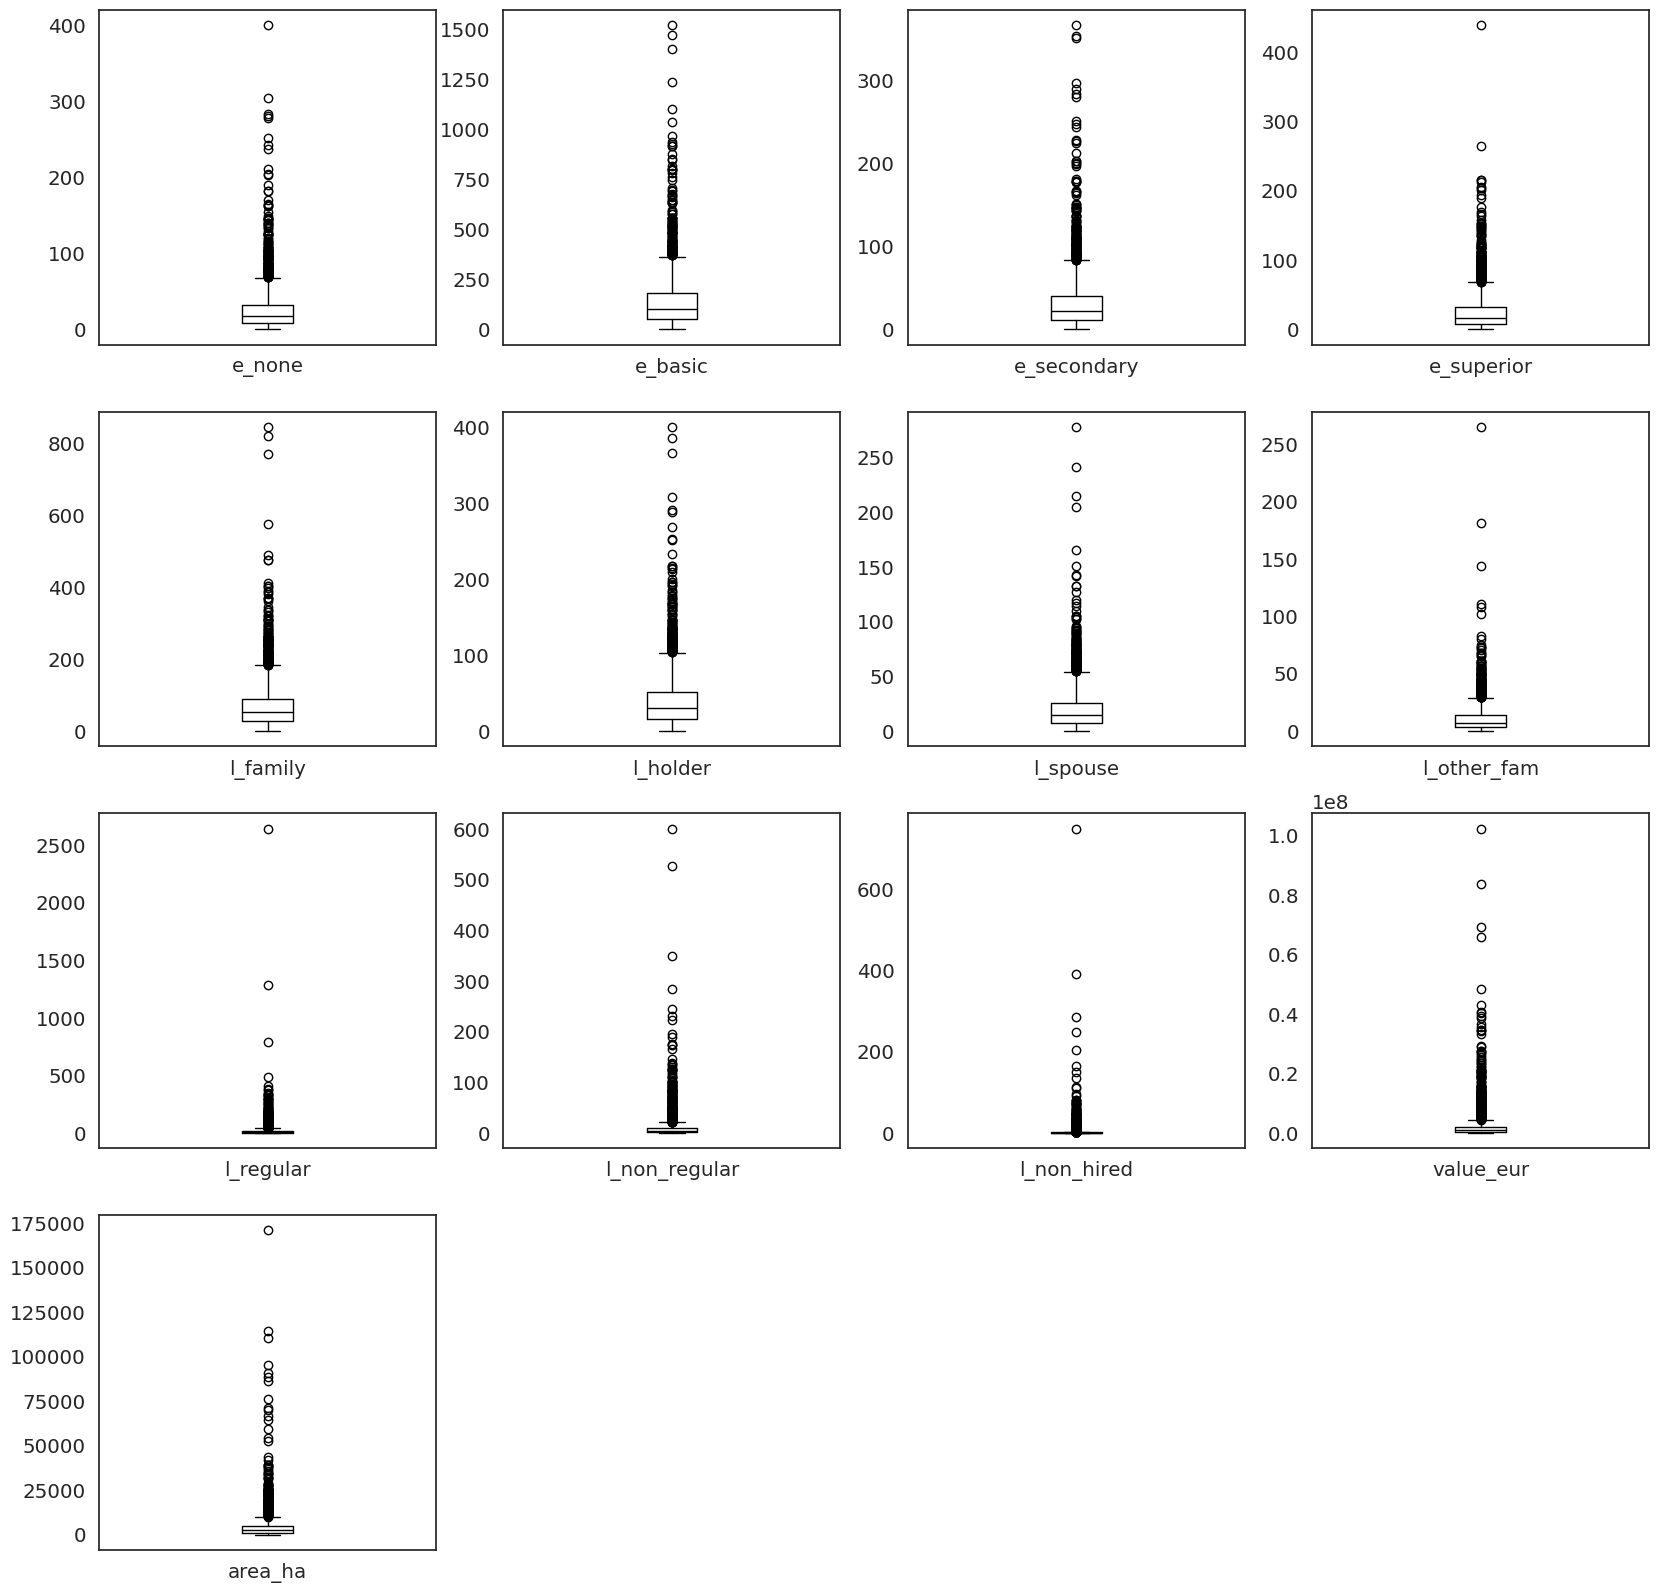

In [5]:
census_df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [6]:
values = ['Norte','Centro','Área Metropolitana de Lisboa', 'Alentejo', 'Algarve']
df1 = census_df.loc[census_df['NUTS2'].isin(values)].copy()

In [7]:
df1.describe

<bound method NDFrame.describe of                        freguesia                municipality    NUTS2  e_none  \
0               Aboim das Choças           Arcos de Valdevez    Norte      15   
1                          Aguiã           Arcos de Valdevez    Norte      24   
2                          Ázere           Arcos de Valdevez    Norte       3   
3                   Cabana Maior           Arcos de Valdevez    Norte      24   
4                       Cabreiro           Arcos de Valdevez    Norte      66   
...                          ...                         ...      ...     ...   
2853                      Sagres               Vila do Bispo  Algarve       7   
2854   Vila do Bispo e Raposeira               Vila do Bispo  Algarve      34   
2855                 Monte Gordo  Vila Real de Santo António  Algarve       1   
2856         Vila Nova de Cacela  Vila Real de Santo António  Algarve      83   
2857  Vila Real de Santo António  Vila Real de Santo António  Algarve       1   

      e_basic  e_secondary  e_superior  l_family  l_holder  l_spouse  \
0          61           11           7        34        15        13   
1          68            5           2        70        38        27   
2          48           12           5        18        11         5   
3          34            5           0        25        15         9   
4         107           23           8       114        71        32   
...       ...          ...         ...       ...       ...       ...   
2853       20            9           1        10         6         1   
2854      108           36          22        55        38         9   
2855        3            0           2         3         1         2   
2856      206           53          52        90        48        22   
2857       19            3           2         8         5         2   

      l_other_fam  l_regular  l_non_regular  l_non_hired  value_eur  area_ha  
0               6          1              0            0     101072   1921.9  
1               5          0              2            0     156561   1642.8  
2               2          0              1            0     140132   2428.6  
3               1          0              0            0     189450    152.7  
4              11          6              3            0     612235    221.4  
...           ...        ...            ...          ...        ...      ...  
2853            2          1              0            0     477153    565.2  
2854            8          9              1            2    2025760    525.2  
2855            0          0              0            0       9550   2405.5  
2856           20        208             23           25    7994345   4468.4  
2857            1          1              1            0     207489   3020.2  

[2858 rows x 16 columns]>

In [8]:
df1.drop(['municipality', 'freguesia', 'NUTS2'], axis = 1, inplace = True)

## 2. Perform the Principal Component Analysis

Data needs to be scaled, otherwise variables with higher absolute value would have a larger weight, generating bias.

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=df1.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [10]:
data_cluster.describe()

,e_none,e_basic,e_secondary,e_superior,l_family,l_holder,l_spouse,l_other_fam,l_regular,l_non_regular,l_non_hired,value_eur,area_ha
count,2.858000e+03,2.858000e+03,2.858000e+03,2.858000e+03,2.858000e+03,2.858000e+03,2.858000e+03,2.858000e+03,2.858000e+03,2.858000e+03,2.858000e+03,2858.000000,2.858000e+03
mean,6.464000e-17,9.944615e-17,-1.988923e-17,-9.944615e-18,4.475077e-17,1.988923e-17,-4.972307e-17,7.707077e-17,9.944615e-18,-3.480615e-17,-1.988923e-17,0.000000,-9.944615e-18
std,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175,1.000175e+00
min,-1.011307e+00,-1.141291e+00,-1.062446e+00,-9.592763e-01,-1.136963e+00,-1.142280e+00,-1.035133e+00,-9.988087e-01,-2.907625e-01,-3.918014e-01,-1.722219e-01,-0.427713,-5.372808e-01
25%,-6.767317e-01,-6.728494e-01,-6.710704e-01,-6.415740e-01,-6.754720e-01,-6.678894e-01,-6.760404e-01,-6.141701e-01,-2.762368e-01,-3.531487e-01,-1.722219e-01,-0.361160,-3.999266e-01
50%,-2.585119e-01,-2.607946e-01,-2.796946e-01,-2.841590e-01,-2.469447e-01,-2.527979e-01,-2.656488e-01,-3.256912e-01,-2.181341e-01,-2.758433e-01,-1.722219e-01,-0.278680,-2.390555e-01
75%,3.269958e-01,4.028306e-01,3.251589e-01,3.115327e-01,3.464008e-01,3.698393e-01,3.499385e-01,3.474263e-01,-4.382606e-02,-4.392719e-02,-1.228280e-01,-0.064274,5.023564e-02
max,7.813129e+00,8.418382e+00,9.220063e+00,7.459834e+00,1.241109e+01,1.074713e+01,1.322597e+01,1.284818e+01,3.814417e+01,2.283846e+01,3.692260e+01,19.674262,2.266075e+01


Here we calculate the PCA, in this case retaining only two components.

In [11]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 71.55%


The comulative value of variance retained is around 70% of the total variance, which can be considered a good value. However, we should check the plot of the first factorial plane, which used the two principal components where samples were projected.

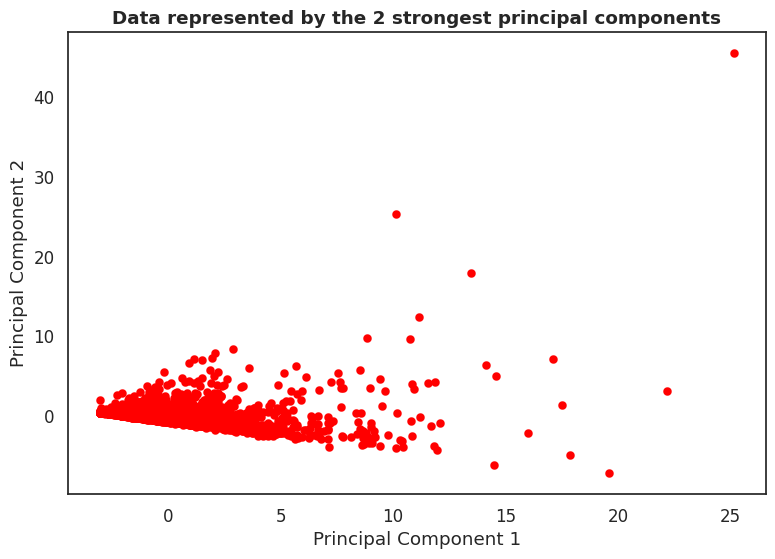

In [12]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

We can se that the plot is highly depedent on a single sample, which generates high bias in the results. We should consider to clean the sample set from outliers. We will ise Isolation Forest to do this.

In [13]:
from sklearn.ensemble import IsolationForest
df2 = df1.copy()

In [14]:
# Model building
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df2)

IsolationForest(contamination=0.1, n_estimators=150)

In [15]:
# Adding 'scores' and 'anomaly' colums to df
scores=model.decision_function(df2)
anomaly=model.predict(df2)

df2['scores']=scores
df2['anomaly']=anomaly

anomaly = df2.loc[df2['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 286


In [16]:
# dropping outliers
df2 = df2.drop(anomaly_index, axis = 0).reset_index(drop=True)

We can repeat the data visualisation to see the effects of removing the outliers.

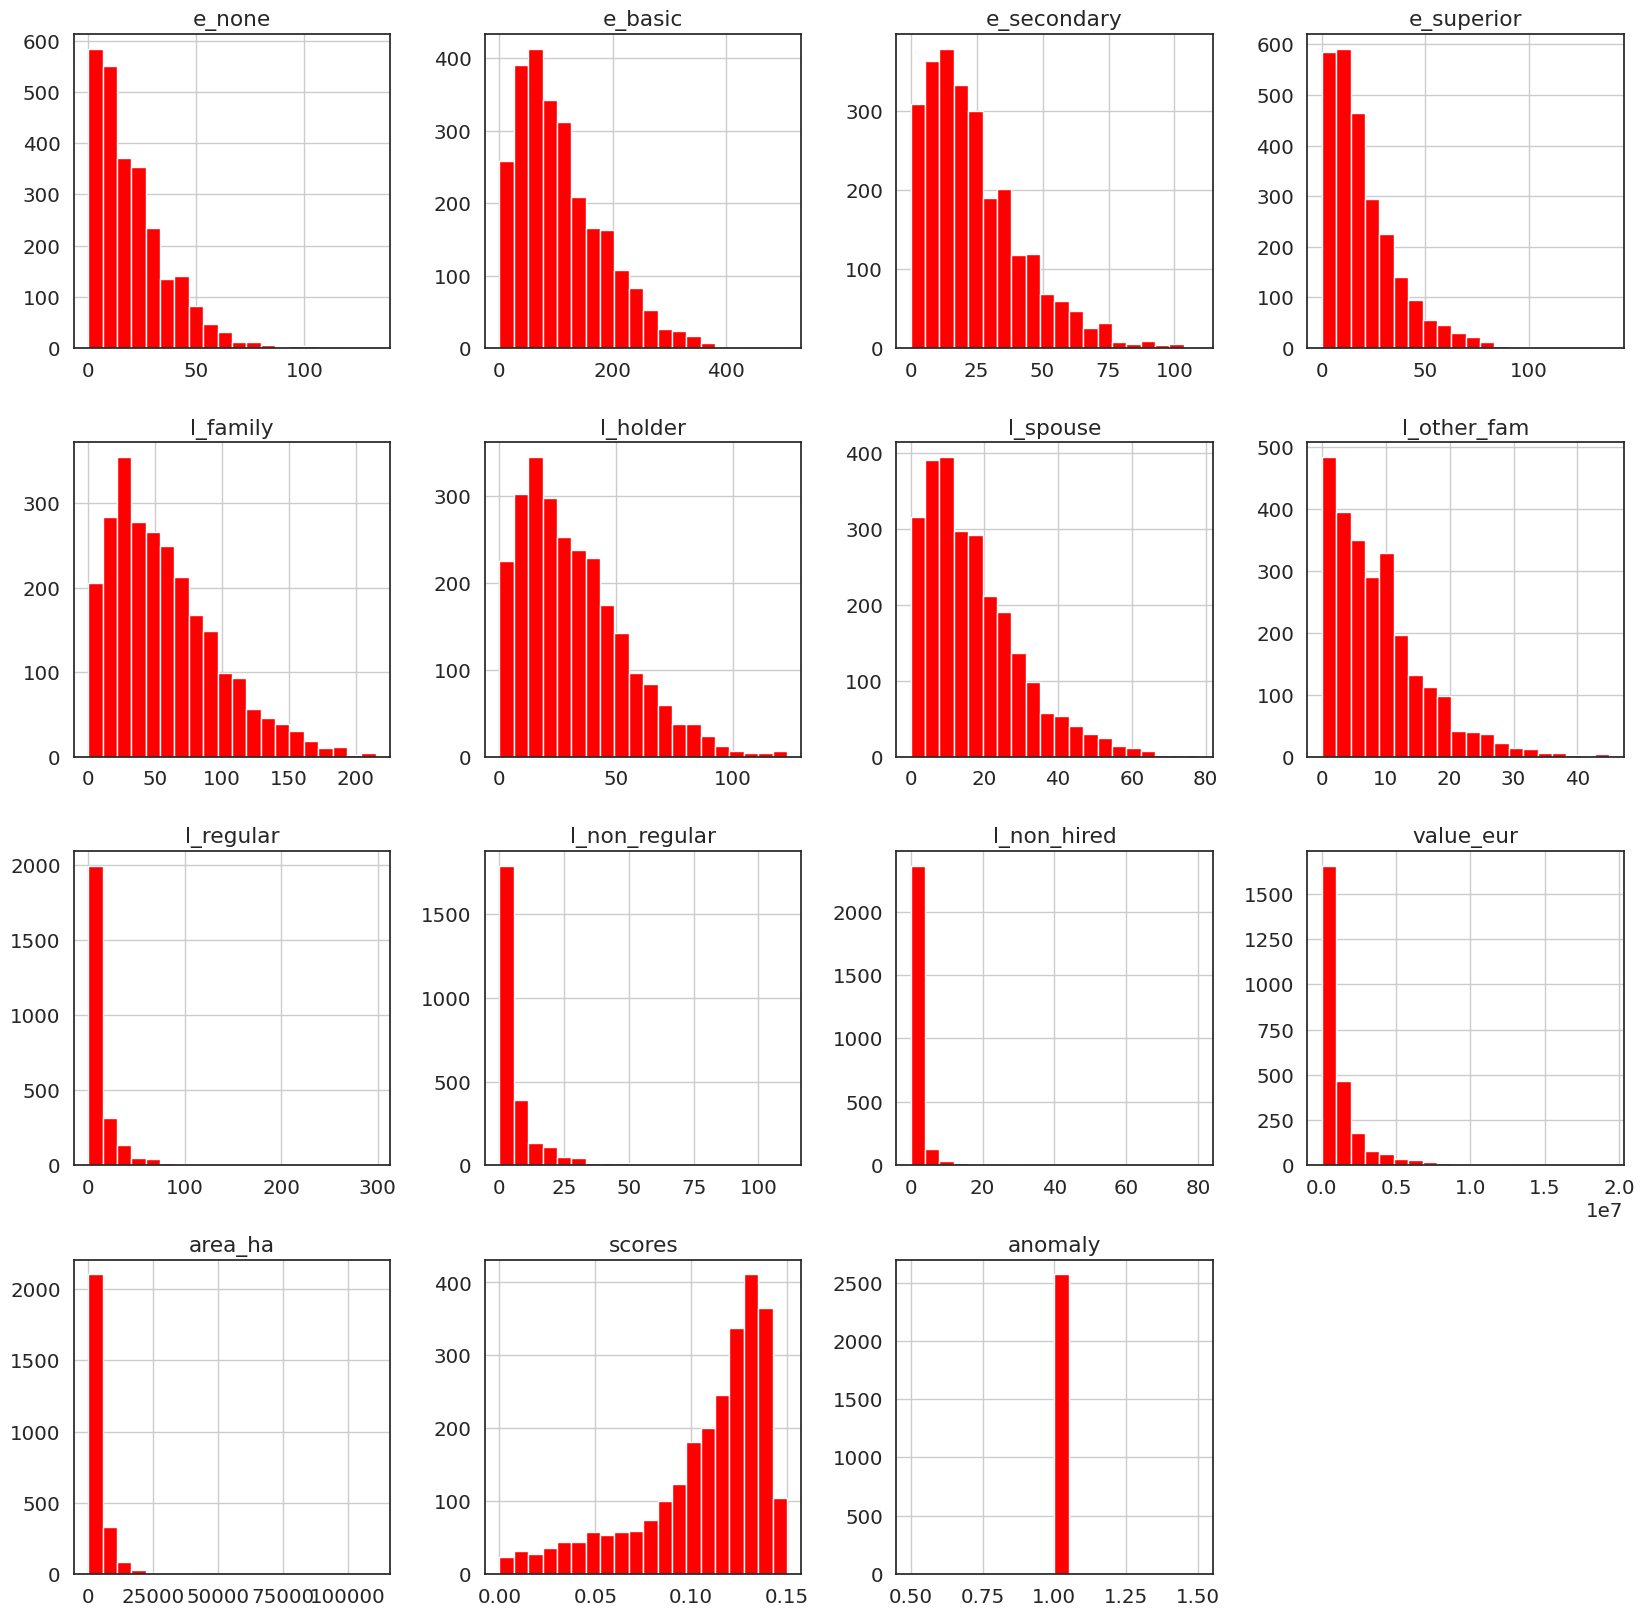

In [17]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df2.hist(bins=20,color='red' )

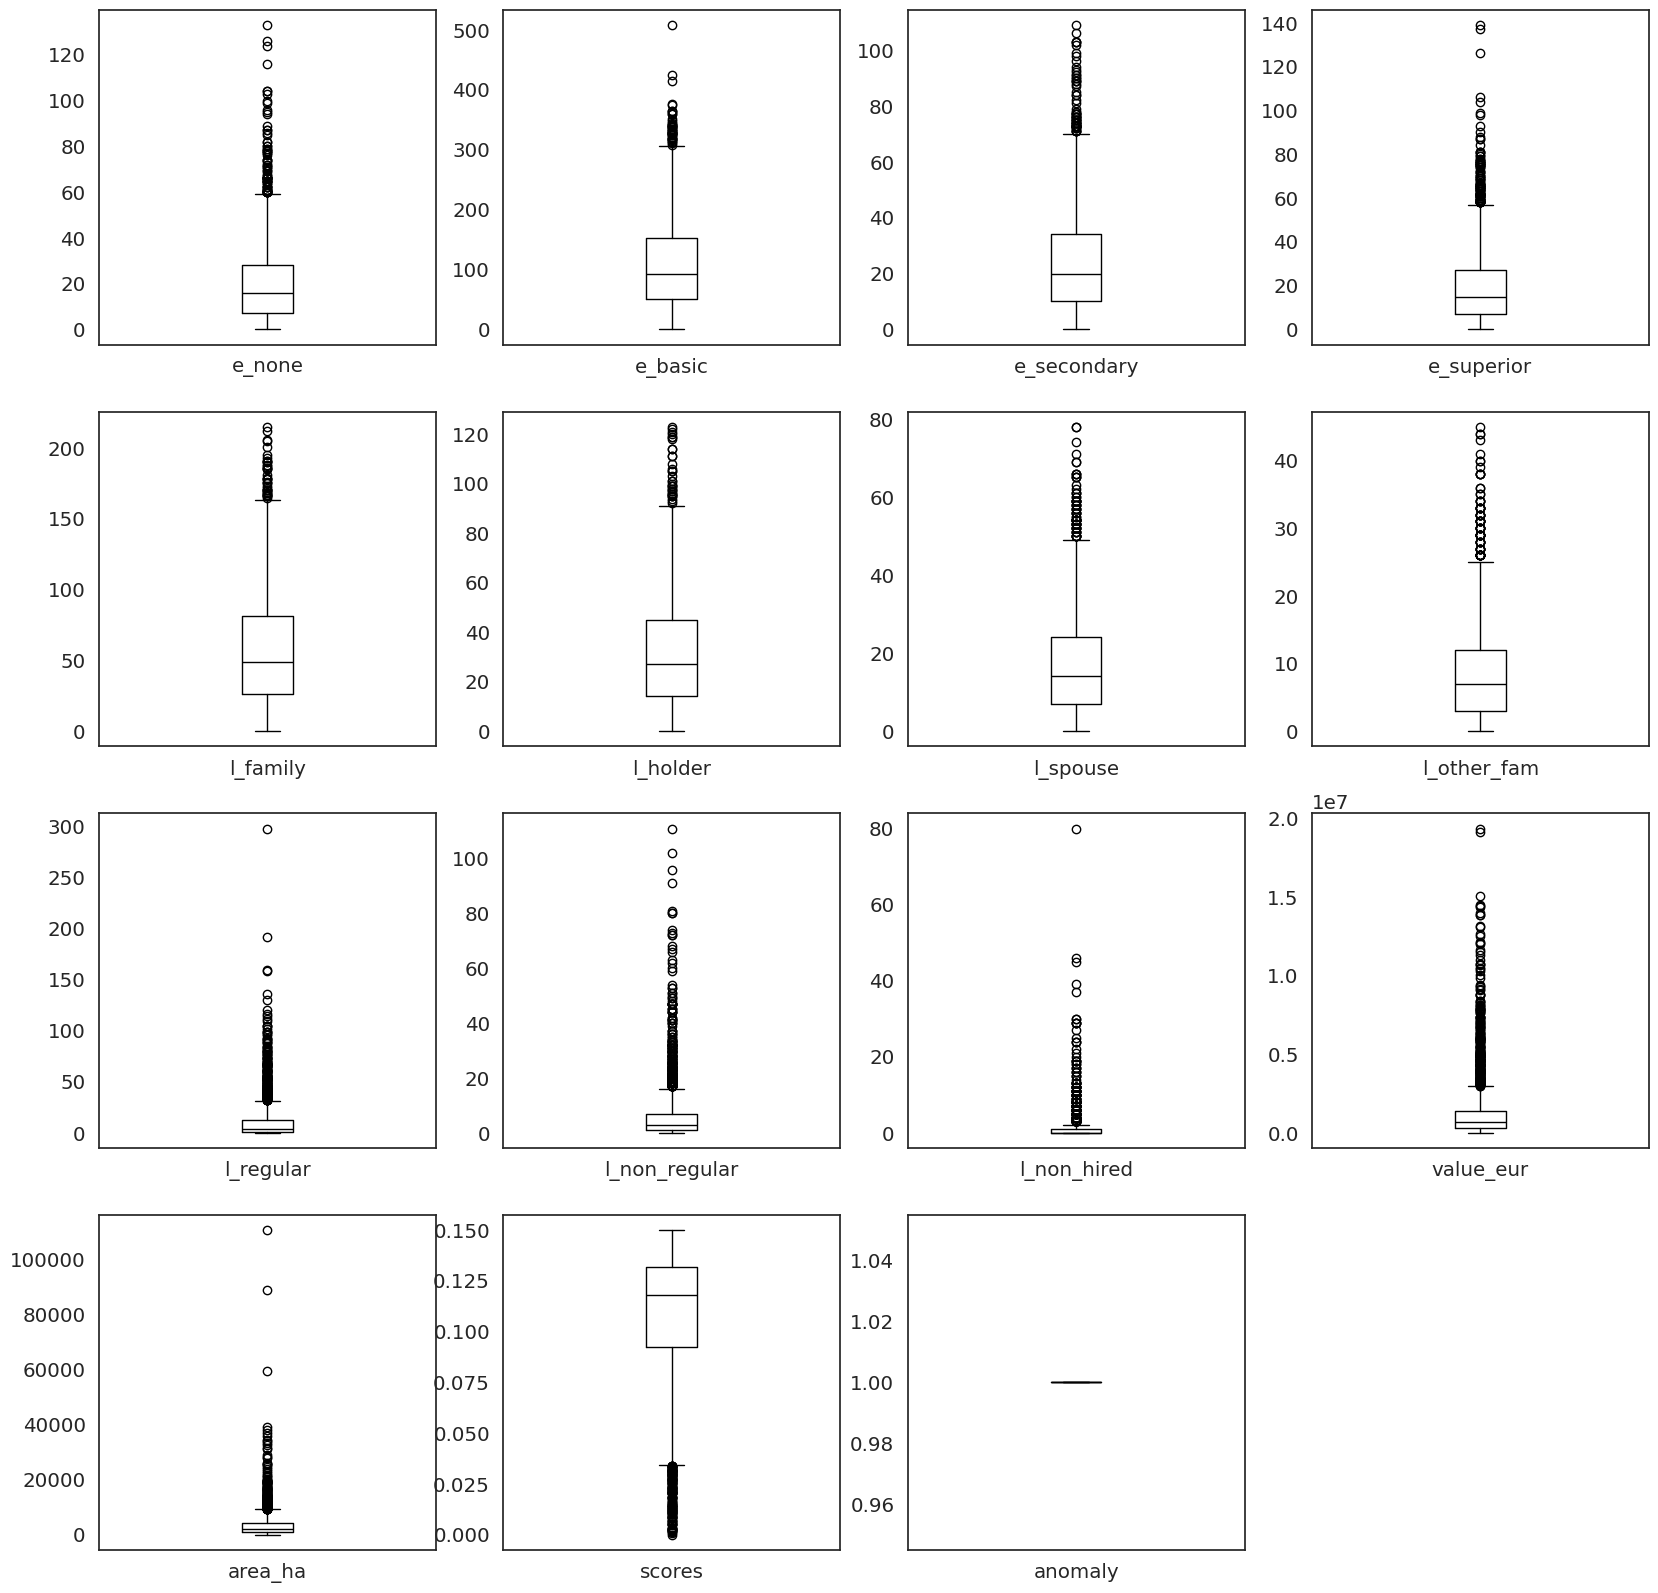

In [18]:
df2.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [19]:
# dropping columns that we don't need any more
df2.drop(['scores', 'anomaly'], axis = 1, inplace =True)

## Repeat PCA calculation

In [20]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=df2.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [21]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 64.53%


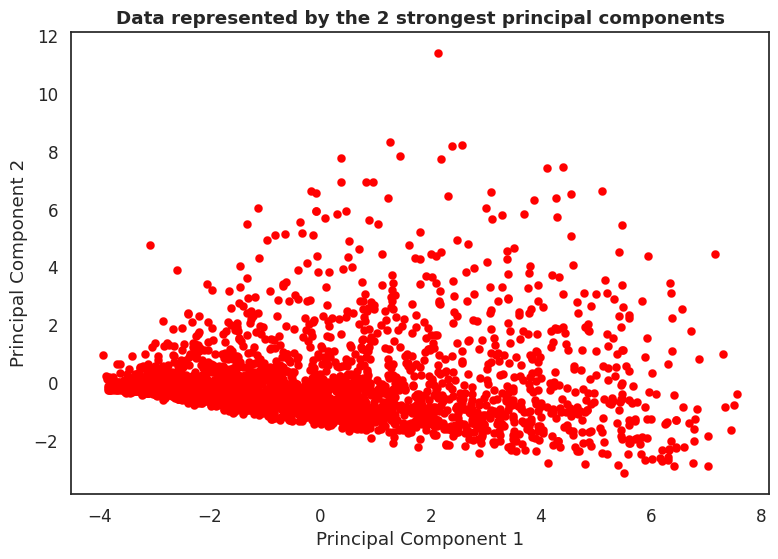

In [22]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

This time, the bias is not as pronounced as before. We will proceed to the cluster creation.

In [23]:
pca_2_result = pd.DataFrame(pca_2_result, columns=["PC1","PC2"])

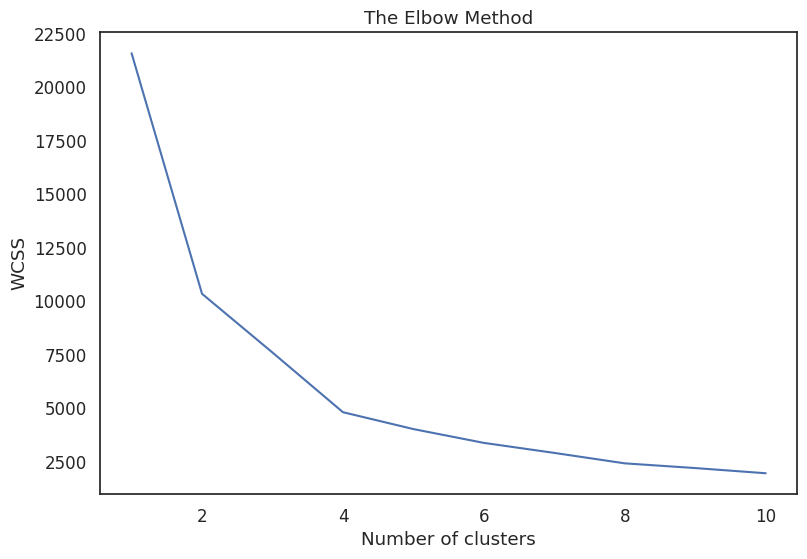

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pca_2_result)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

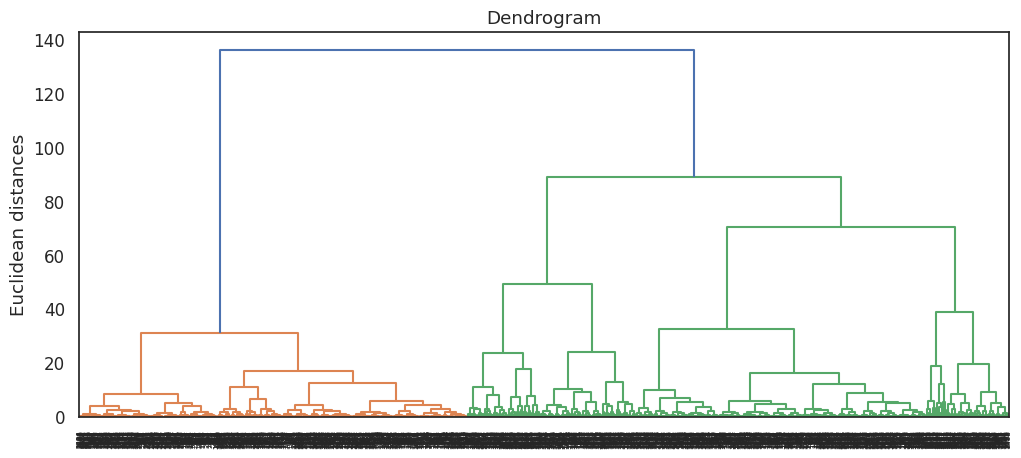

In [25]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(pca_2_result, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [26]:
df_kmeans = pca_2_result.copy()

We will use four clusters.

In [27]:
# Training model
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)

In [28]:
df_kmeans

,PC1,PC2
0,-1.795276,-0.741194
1,-0.732699,-1.277719
2,-2.668849,-0.333771
3,-2.392510,-0.702825
4,2.091082,-1.795618
...,...,...
2567,-2.478556,-0.180077
2568,-3.095979,-0.222923
2569,0.346928,0.006231
2570,-3.696569,-0.188031


In [29]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_kmeans = pca_2_result.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_kmeans['Cluster'] = y_kmeans
df_kmeans['Cluster'].value_counts()

,count
Cluster,
2,1116
0,850
3,406
1,200


<Axes: xlabel='PC1', ylabel='PC2'>

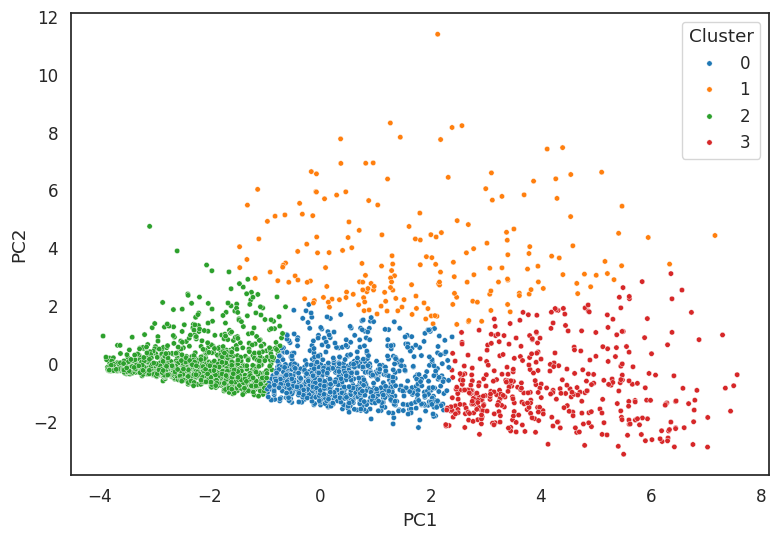

In [30]:
# plt.figure(figsize=(15,7))
sns.scatterplot(data=df_kmeans, x='PC1', y='PC2', hue = 'Cluster', s=15, palette="tab10")

# Hierarchical clustering
## Agglomerative clustering

In [31]:
# Copying data sets
df_AgglomerativeC = pca_2_result.copy()

In [32]:
from sklearn.cluster import AgglomerativeClustering

# Training model
AgglomerativeC = AgglomerativeClustering(n_clusters=4, metric = 'euclidean', linkage = 'ward')
y_AgglomerativeC = AgglomerativeC.fit_predict(df_AgglomerativeC)

In [33]:
# We called the df, that's why we need to refer to previous df to add cluster numbers
df_AgglomerativeC = pca_2_result.copy()
# Checking number of items in clusters and creating 'Cluster' column
df_AgglomerativeC['Cluster'] = y_AgglomerativeC
df_AgglomerativeC['Cluster'].value_counts()

,count
Cluster,
3,1076
1,803
0,465
2,228


<Axes: xlabel='PC1', ylabel='PC2'>

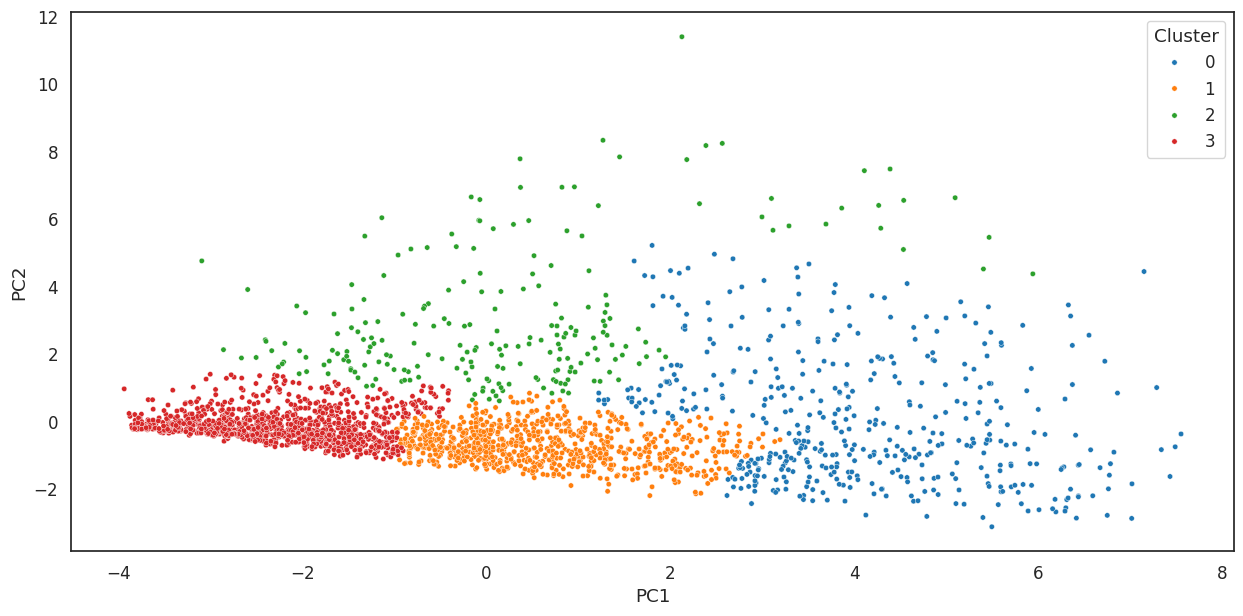

In [34]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_AgglomerativeC, x='PC1', y='PC2', hue = 'Cluster', s=15, palette="tab10")